## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis
- Feature Engineering
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [5]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [7]:
df.shape

(303, 11)

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
caa,0


#### As we can see there are no null values in our Data Set

In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

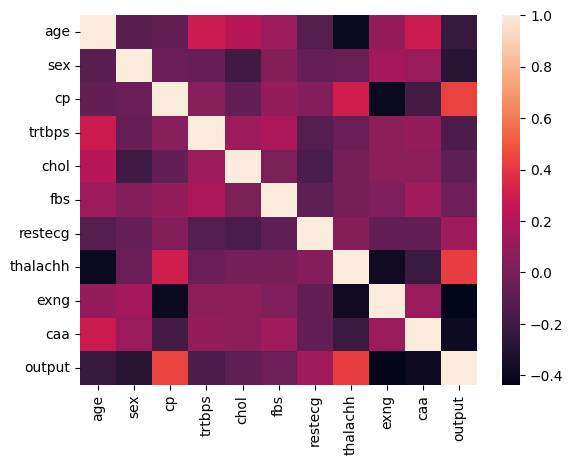

In [10]:
sns.heatmap(df.corr())

#### As we can see our variables are not highly correlated to each other

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

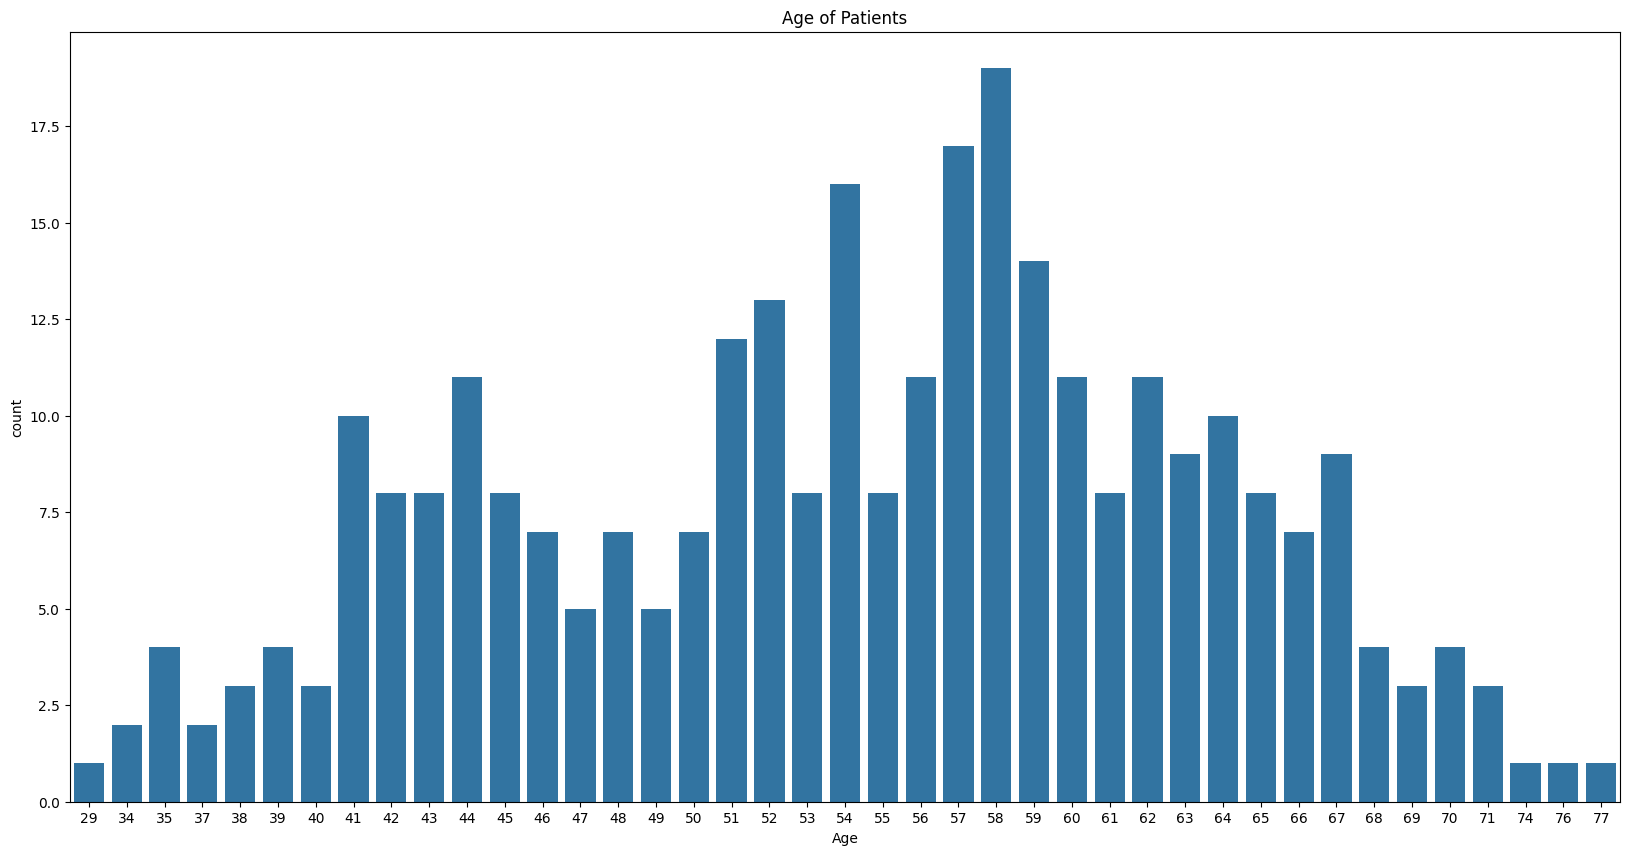

In [11]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

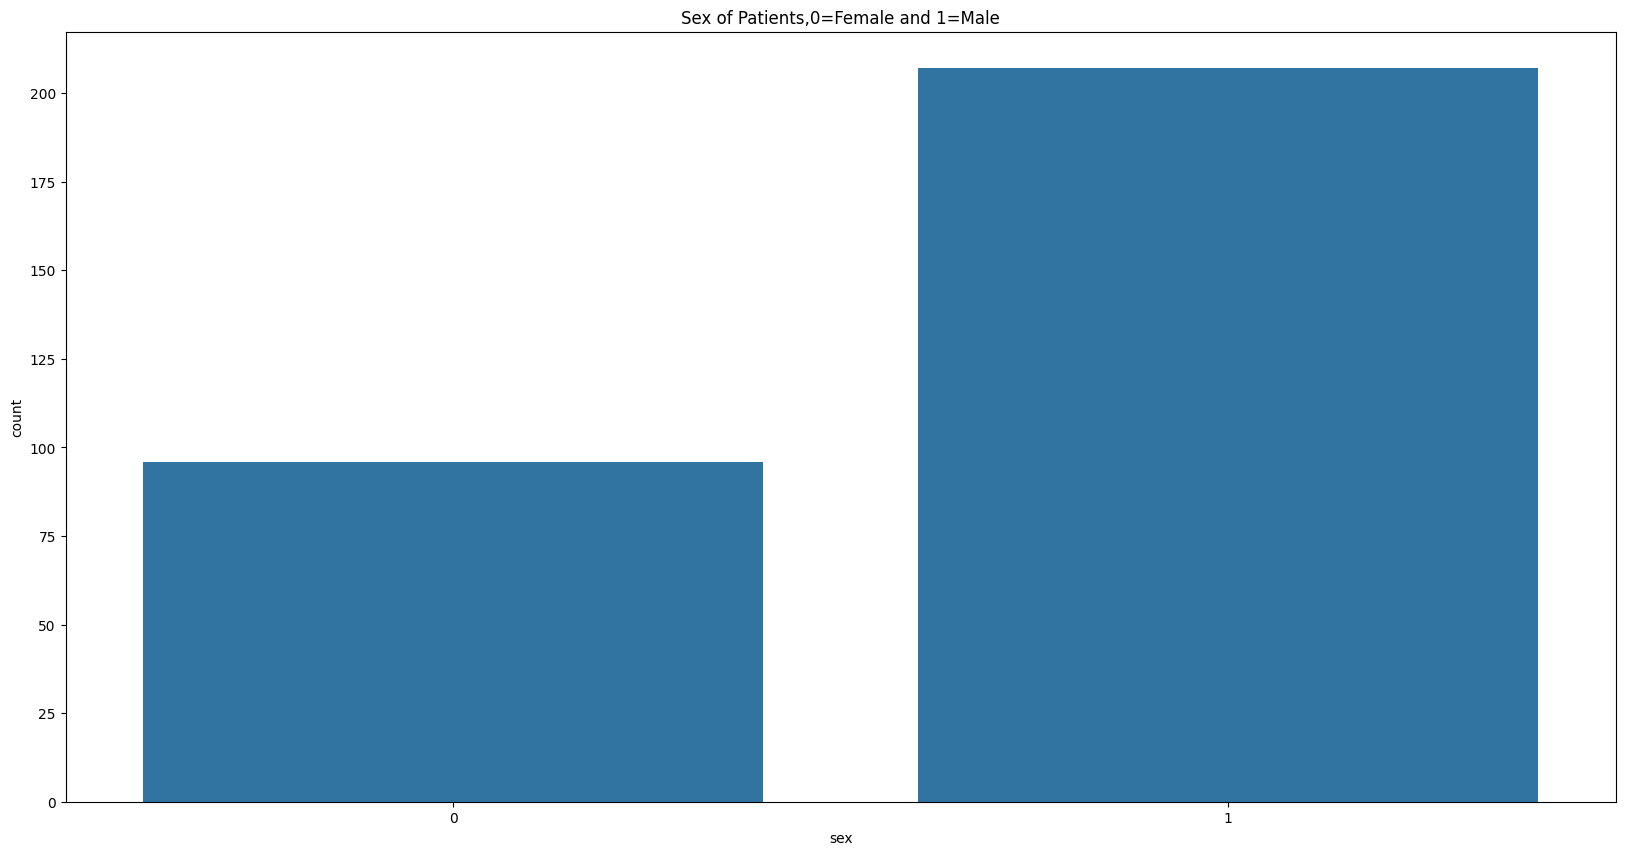

In [12]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [14]:
# cp_data= df['cp'].value_counts().reset_index()
# cp_data['index'][3]= 'asymptomatic'
# cp_data['index'][2]= 'non-anginal'
# cp_data['index'][1]= 'Atyppical Anigma'
# cp_data['index'][0]= 'Typical Anigma'
# cp_data
# Get the value counts and reset the index
cp_data = df['cp'].value_counts().reset_index()

# Rename the columns for better readability
cp_data.columns = ['cp_type', 'count']

# Create a mapping dictionary for renaming the 'cp_type' values
cp_type_mapping = {
    3: 'asymptomatic',
    2: 'non-anginal',
    1: 'Atypical Angina',
    0: 'Typical Angina'
}

# Replace the cp_type values using the mapping dictionary
cp_data['cp_type'] = cp_data['cp_type'].map(cp_type_mapping)

cp_data

,cp_type,count
0,Typical Angina,143
1,non-anginal,87
2,Atypical Angina,50
3,asymptomatic,23


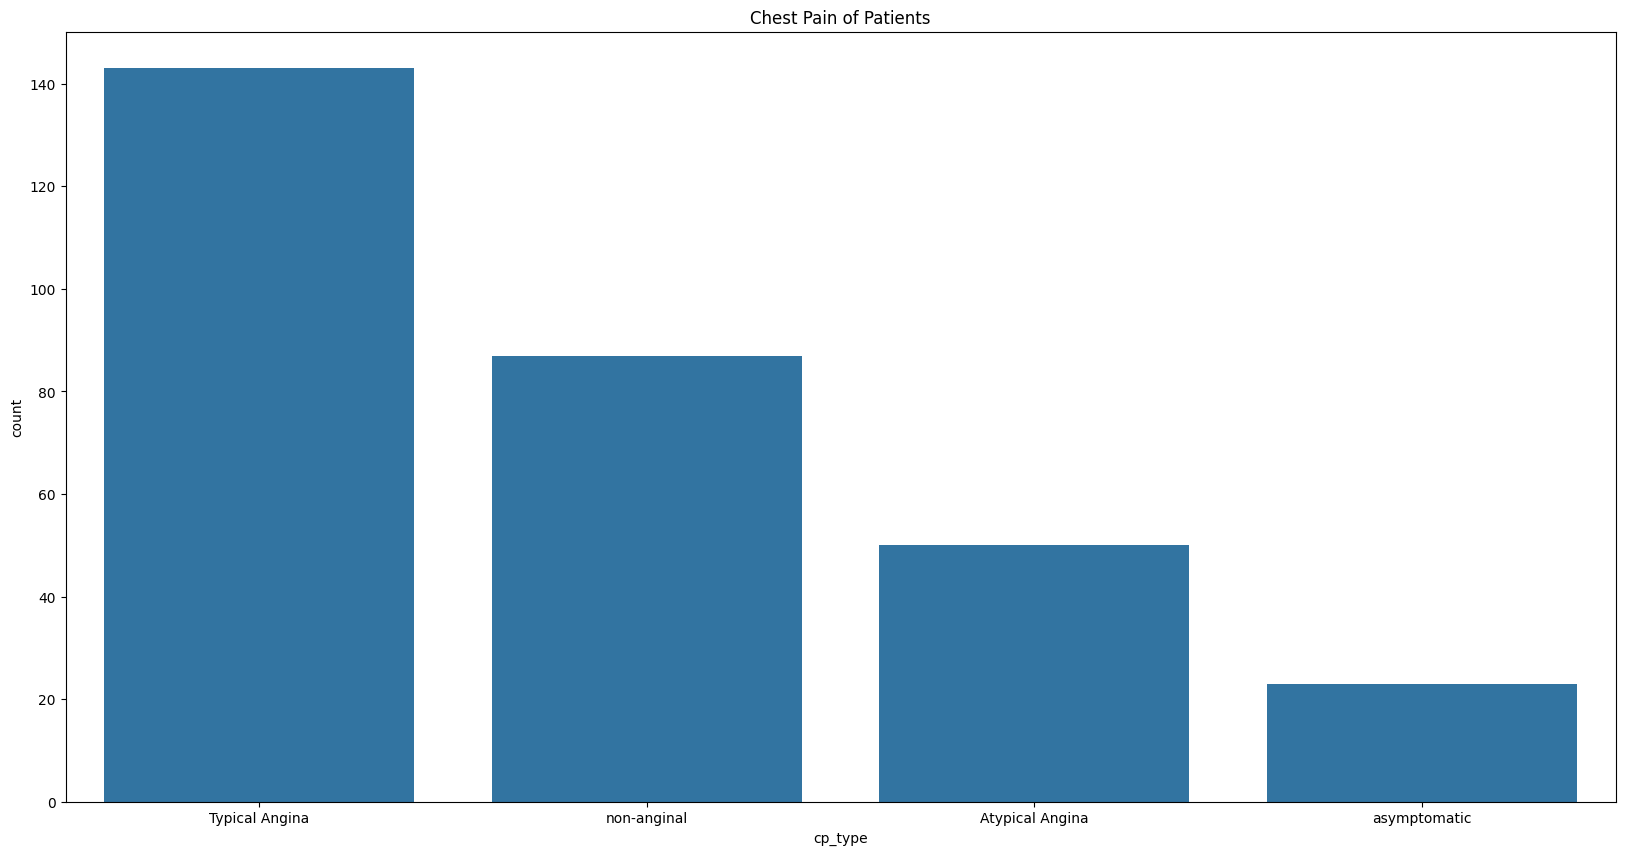

In [16]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Set the title
plt.title("Chest Pain of Patients")

# Create the bar plot
sns.barplot(x=cp_data['cp_type'], y=cp_data['count'])

# Show the plot
plt.show()

#### We have seen how the the Chest Pain Category is distributed

In [18]:
# Get the value counts and reset the index
ecg_data = df['restecg'].value_counts().reset_index()

# Rename the columns for better readability
ecg_data.columns = ['ecg_type', 'count']

# Create a mapping dictionary for renaming the 'ecg_type' values
ecg_type_mapping = {
    0: 'normal',
    1: 'having ST-T wave abnormality',
    2: 'showing probable or definite left ventricular hypertrophy by Estes'
}

# Replace the ecg_type values using the mapping dictionary
ecg_data['ecg_type'] = ecg_data['ecg_type'].map(ecg_type_mapping)

# Display the DataFrame
ecg_data

,ecg_type,count
0,having ST-T wave abnormality,152
1,normal,147
2,showing probable or definite left ventricular ...,4


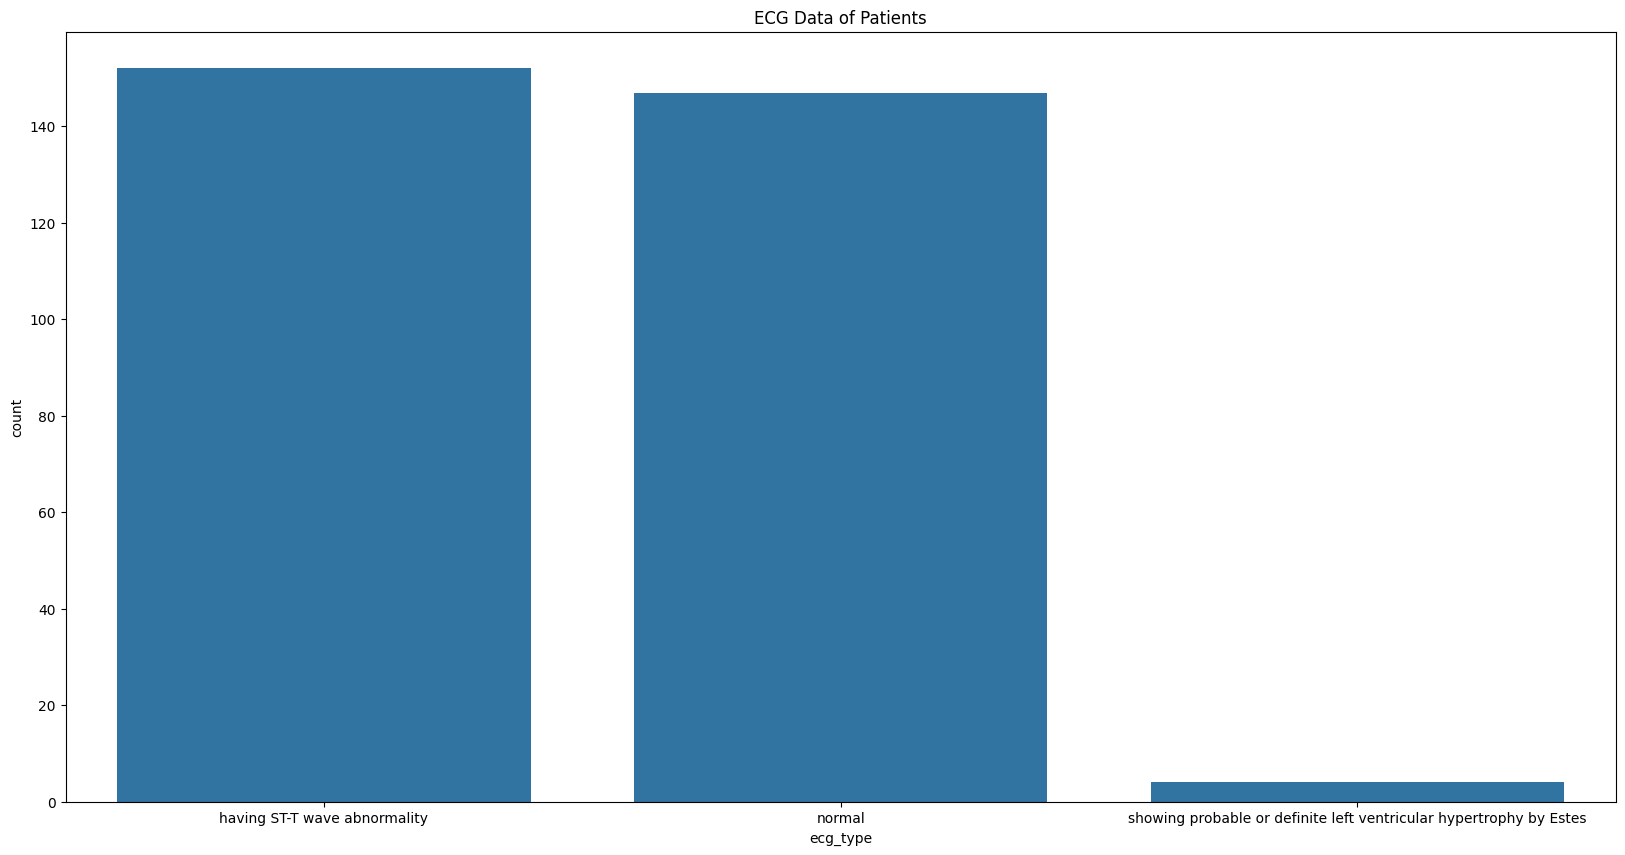

In [20]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Set the title
plt.title("ECG Data of Patients")

# Create the bar plot
sns.barplot(x=ecg_data['ecg_type'], y=ecg_data['count'])

# Show the plot
plt.show()

#### This is our ECG Data

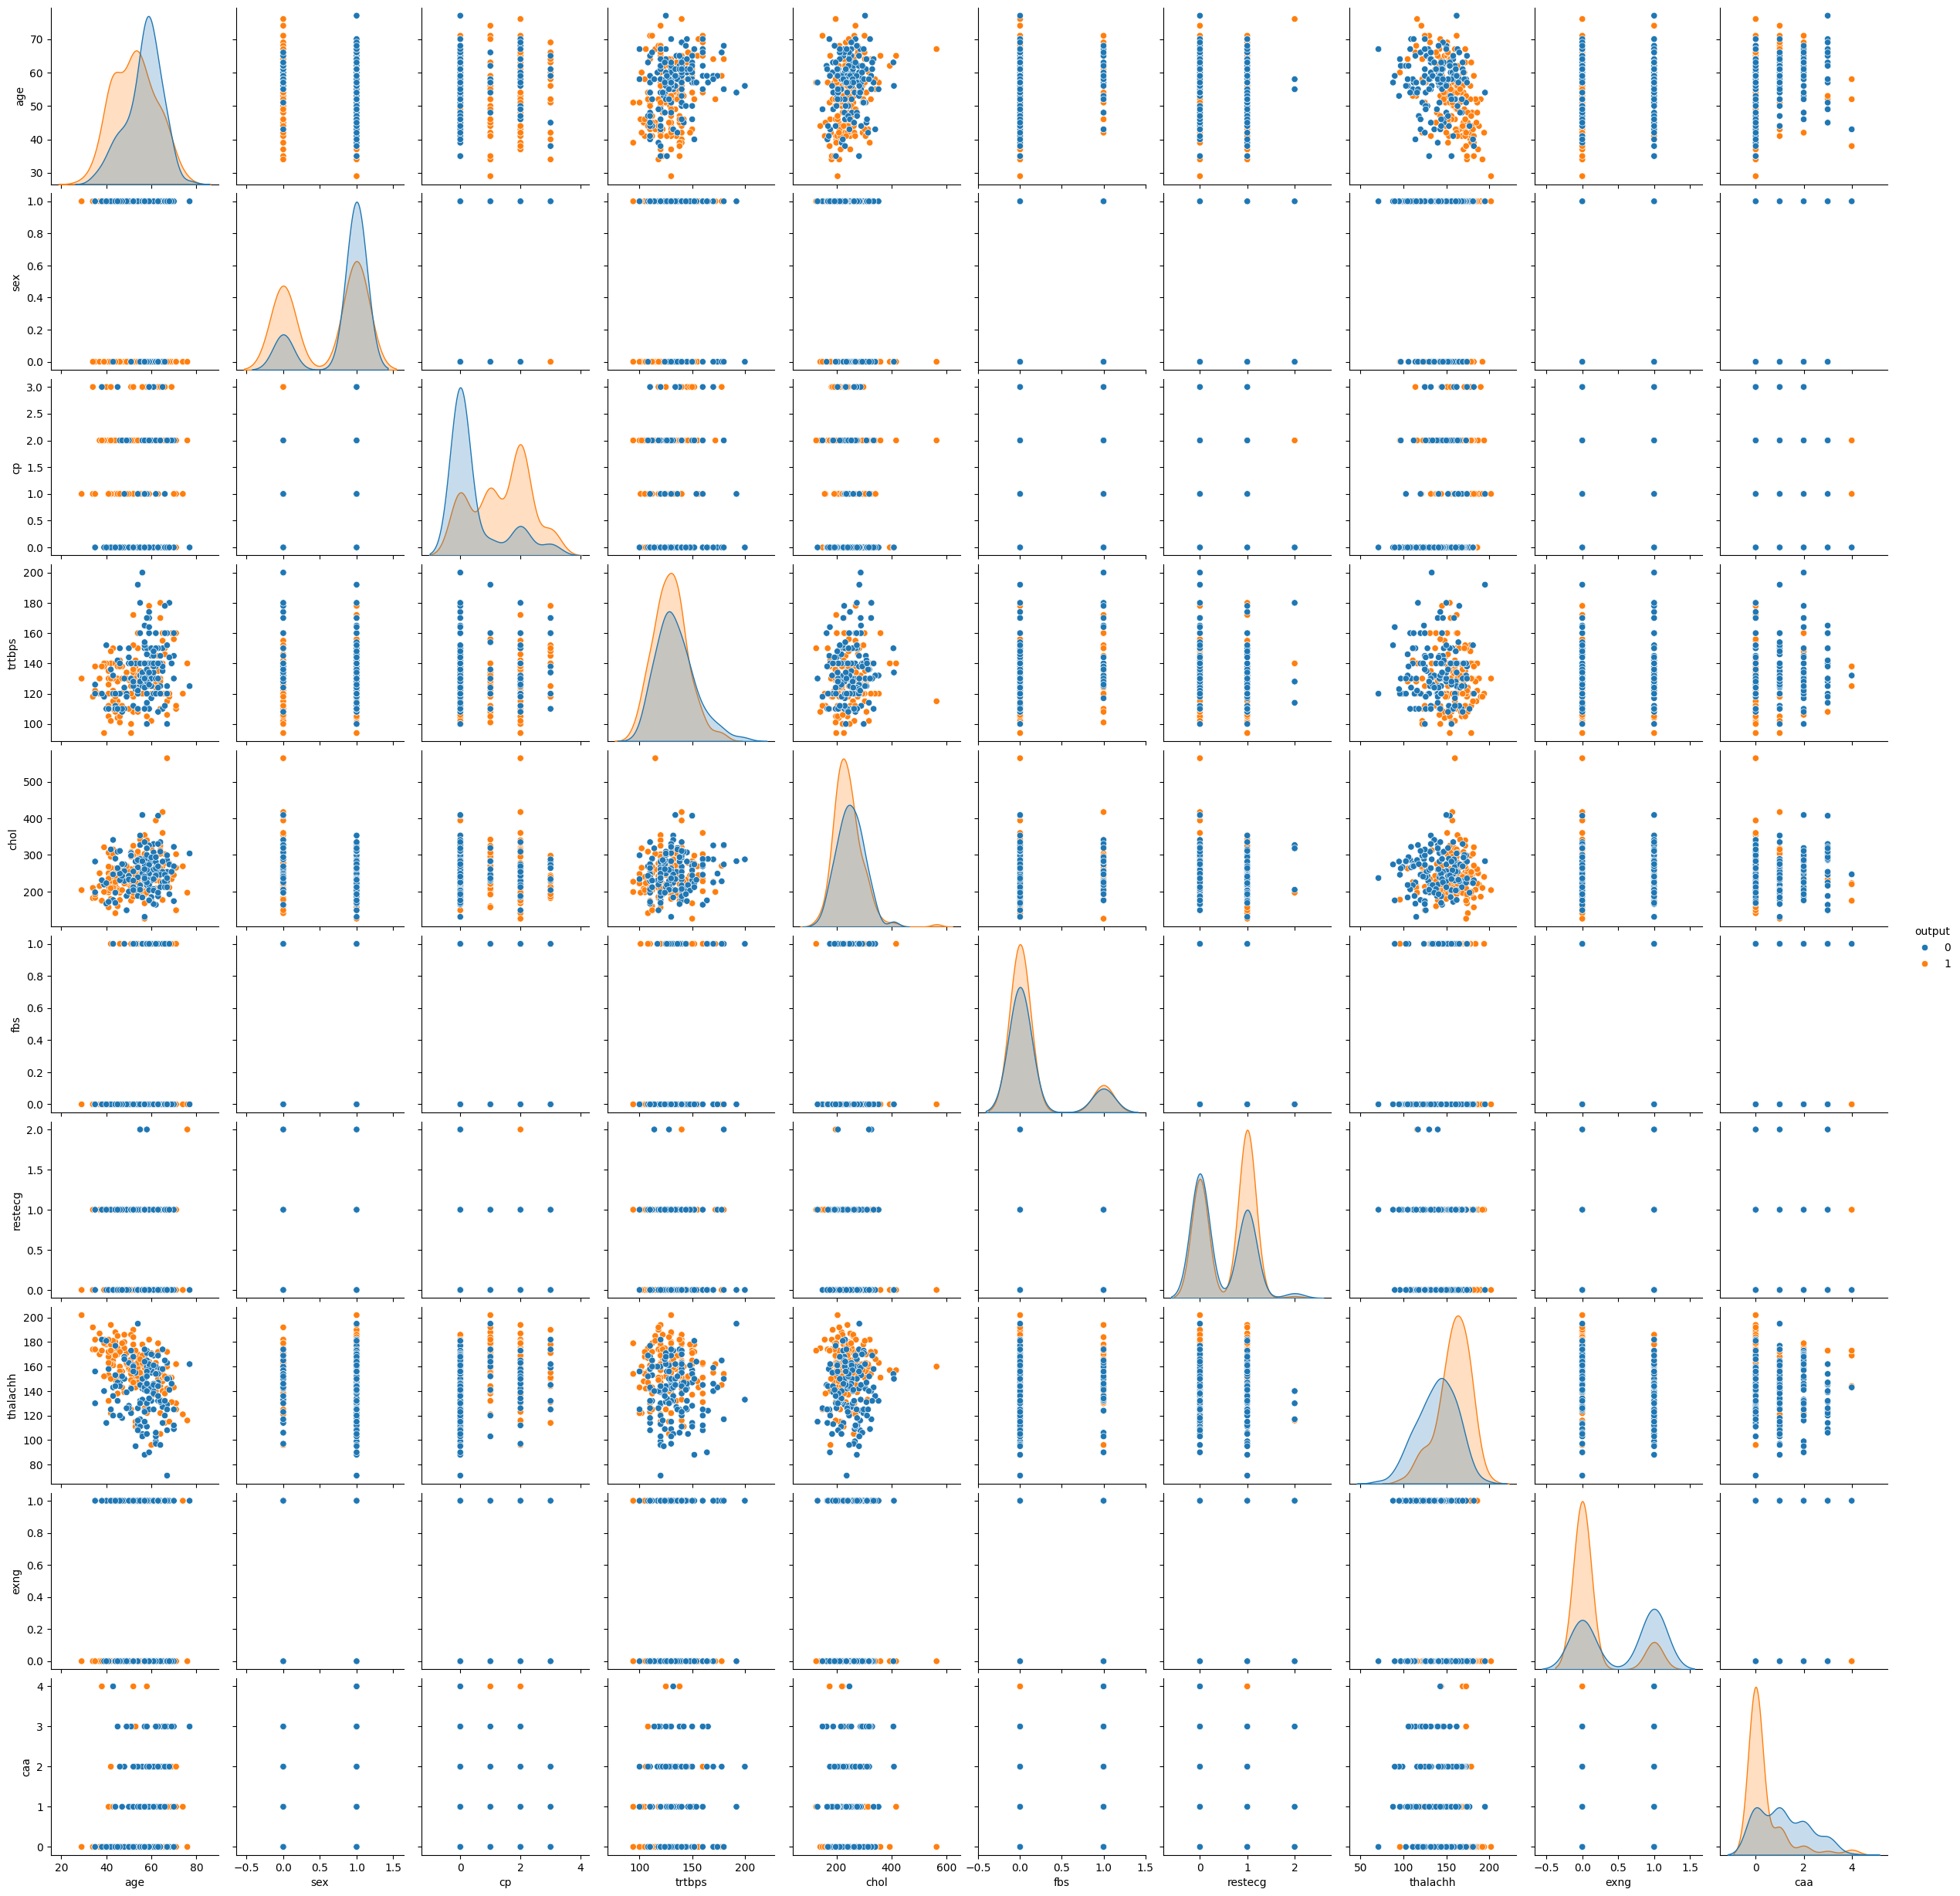

In [22]:
# Create a pairplot
sns.pairplot(df, hue='output')

# Show the plot
plt.show()

### Let us see for our Continuous Variable

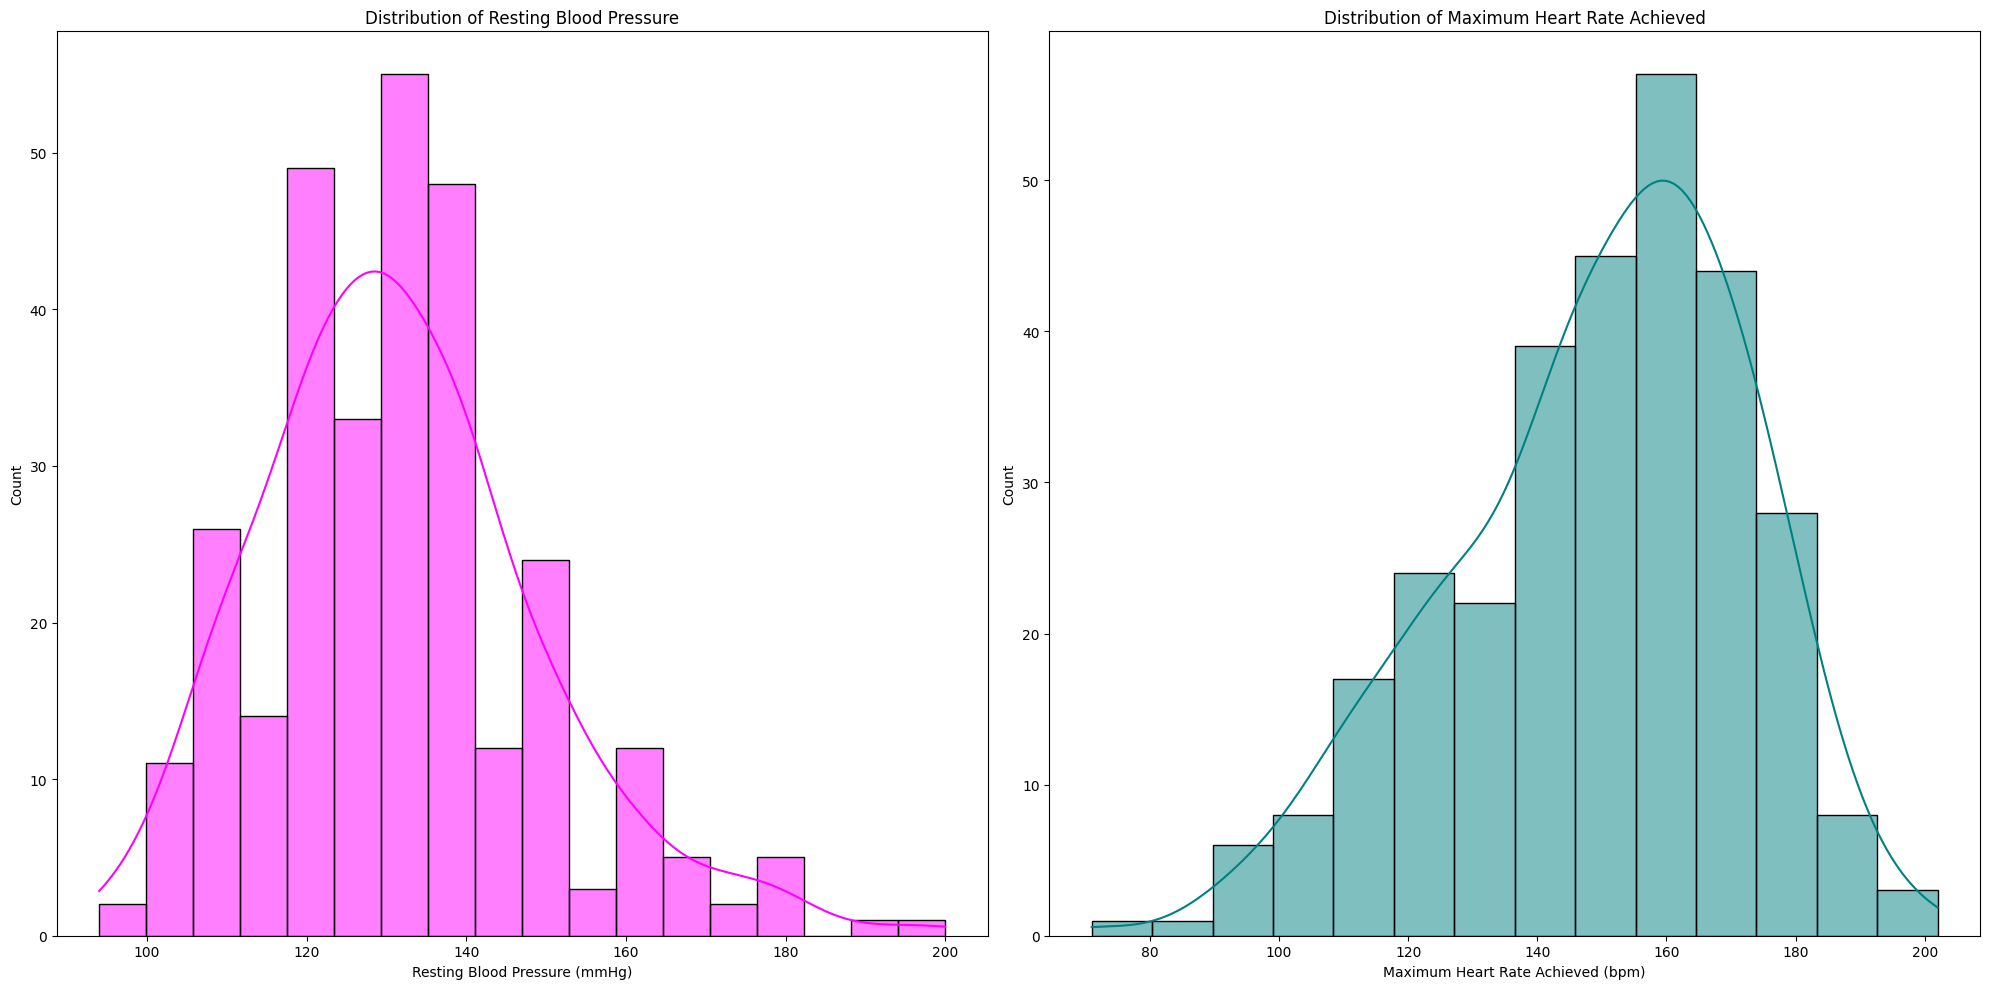

In [24]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the first subplot for Resting Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], kde=True, color='magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.title("Distribution of Resting Blood Pressure")

# Plot the second subplot for Maximum Heart Rate Achieved
plt.subplot(1, 2, 2)
sns.histplot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")
plt.title("Distribution of Maximum Heart Rate Achieved")

# Show the plot
plt.tight_layout()
plt.show()

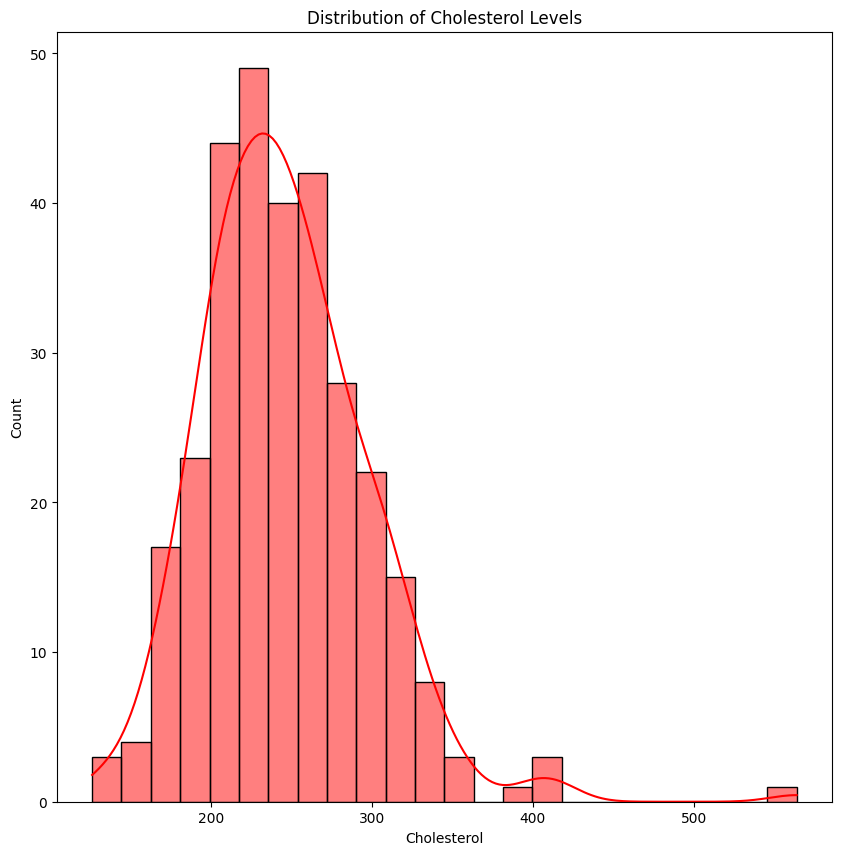

In [26]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create a histogram with a KDE for the 'chol' column
sns.histplot(df['chol'], kde=True, color='red')

# Set the x-axis label
plt.xlabel("Cholesterol")

# Set the title
plt.title("Distribution of Cholesterol Levels")

# Show the plot
plt.show()

#### We have done the Analysis of the data now let's have a look at out data

In [27]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let us do Standardisation

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scale=StandardScaler()

In [30]:
scale.fit(df)

StandardScaler()

In [31]:
df= scale.transform(df)

In [32]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [34]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [35]:
y= df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lbl= LabelEncoder()

In [43]:
 # encoded_y= lbl.fit_transform(y_train)
 encoded_y = lbl.fit_transform(y_train.iloc[:, 0].values)

In [44]:
logreg= LogisticRegression()

In [45]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


LogisticRegression()

In [48]:
Y_pred1 = logreg.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [50]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [52]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [53]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
tree= DecisionTreeClassifier()

In [56]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [57]:
ypred2=tree.predict(x_test)

In [58]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [60]:
tree_conf_matrix

array([[26, 18],
       [10, 37]])

In [61]:
print(tree_acc_score*100,"%")

69.23076923076923 %


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf= RandomForestClassifier()

In [64]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [65]:
ypred3 = rf.predict(x_test)

In [66]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [67]:
rf_conf_matrix

array([[35,  9],
       [ 6, 41]])

In [68]:
print(rf_acc_score*100,"%")

83.51648351648352 %


#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

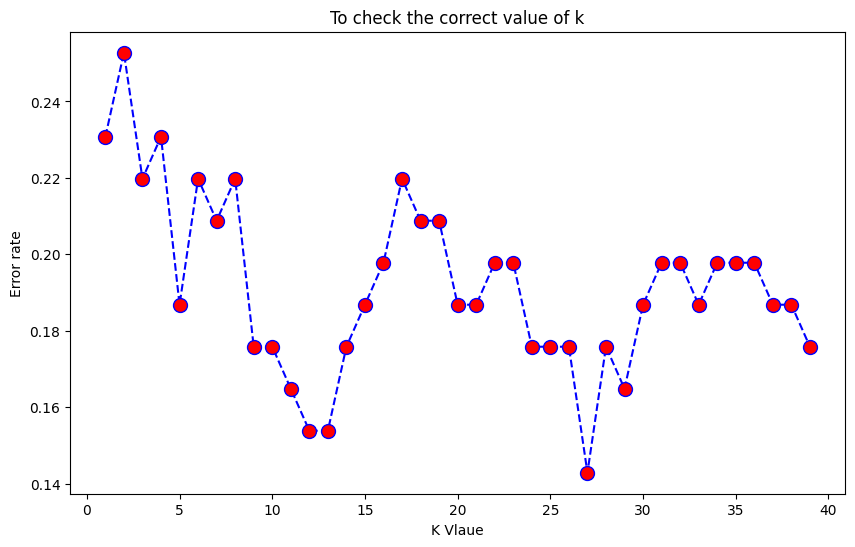

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [72]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [73]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [74]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [75]:
print(knn_acc_score*100,"%")

84.61538461538461 %


#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [76]:
from sklearn import svm

In [77]:
svm= svm.SVC()

In [78]:
svm.fit(x_train,encoded_y)

SVC()

In [79]:
ypred5= svm.predict(x_test)

In [80]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [81]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [82]:
print(svm_acc_score*100,"%")

80.21978021978022 %


#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [83]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [84]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [85]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,83.516484
4,SVM,80.219780
1,Decision Tree,69.230769


#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

In [88]:
adab.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [89]:
ypred6=adab.predict(x_test)

In [90]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [91]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [92]:
print(adab_acc_score*100,"%")

51.64835164835166 %


In [93]:
adab.score(x_train,encoded_y)

0.5566037735849056

In [94]:
adab.score(x_test,encoded_ytest)

0.5164835164835165

#### As we see our model has performed very poorly with just 50% accuracy

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,83.516484
4,SVM,80.219780
1,Decision Tree,69.230769


### Logistic Regression

In [97]:
param_grid= {

    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]

}

In [98]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [99]:
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [100]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

#### Let us apply these para in our Model

In [101]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [102]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [103]:
logreg_pred= logreg1.predict(x_test)

In [104]:
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [105]:
logreg_pred_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [106]:
print(logreg_pred_acc_score*100,"%")

81.31868131868131 %


#### We got an accuracy of 81%

### KNN

In [107]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [108]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [109]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [110]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [111]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [112]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [113]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

#### Let's apply

In [114]:
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [115]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [116]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [117]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


#### We have an Accuracy of 82.5%

### SVM

In [118]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [119]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [120]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [121]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

#### Let us apply these

In [122]:
from sklearn.svm import SVC

In [123]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [124]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, kernel='sigmoid')

In [125]:
svm_pred= svc.predict(x_test)

In [126]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [127]:
svm_pred_conf_matrix

array([[32, 12],
       [ 5, 42]])

In [128]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [129]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [130]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [131]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [132]:
print(lr_acc_score*100,"%")

85.71428571428571 %


#### Let us build a proper confusion matrix for our model

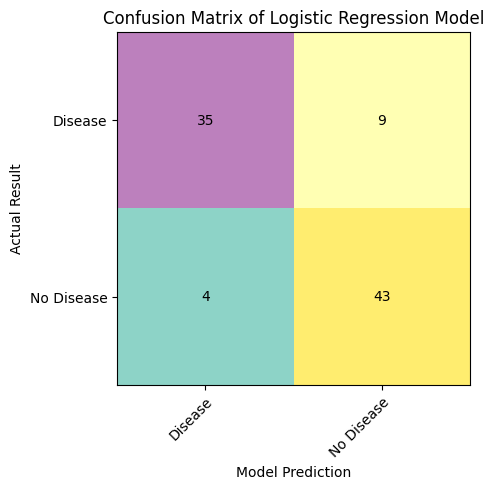

ACCURACY of our model is  85.71428571428571 %


In [133]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [134]:
import pickle

In [135]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 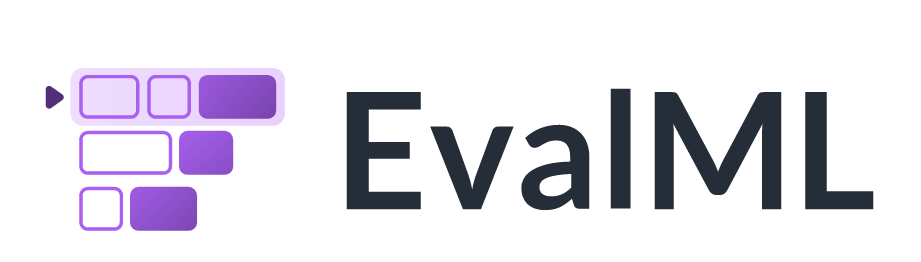
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [1]:
!pip install evalml

# Let us load our DataSet.

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [5]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(df.iloc[:,-1:])
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Importing Eval ML Library**

In [8]:
import evalml

Eval ML Library will do all the pre processing techniques for us and split the data for us

In [9]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [10]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

**Running the Auto ML to select best Algorithm**

In [11]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.3864424228668213,
  'Total time of batch': 2.510009288787842},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.362484931945801,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.1146175861358643,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.3661298751831055,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.170154094696045,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 2.5210769176483154,
  'Total time of batch': 10.195919752120972}}

As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [12]:

automl.rankings


,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.413358,0.413358,0.029595,97.476877,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.462099,0.462099,0.066745,97.179366,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.466918,0.466918,0.024541,97.149952,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,6,Logistic Regression Classifier w/ Label Encode...,6,0.469254,0.469254,0.074869,97.135689,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.470037,0.470037,0.075389,97.130913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.499149,0.499149,0.043147,96.953213,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,16.382805,16.382805,0.141301,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [13]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Label Encoder.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [14]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [15]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
**********************************************************************************


* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *


**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:**********************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']


4. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:4. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : sqrt


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : sqrt


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.1 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.604 0.776 0.888      0.839 0.765                     0.795            0.802        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.601 0.789 0.894      0.837 0.762                     0.793            0.802          -            -
std                    0.030       0.004 0.050 0.025      0.003 0.004                     0.002            0.001          -            -
coef of var            0.072       0.007 0.063 0.028      0.004 0.005                     0.003            0.002          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.380       0.604 0.844 0.922      0.839 0.765                     0.795            0.802        161           81
1                      0.424       0.604 0.776 0.888      0.839 0.765                     0.795            0.802        161           81
2                      0.436       0.597 0.746 0.873      0.833 0.758                     0.790            0.800        162           80
mean                   0.413       0.601 0.789 0.894      0.837 0.762                     0.793            0.802          -            -
std                    0.030       0.004 0.050 0.025      0.003 0.004                     0.002            0.001          -            -
coef of var            0.072       0.007 0.063 0.028      0.004 0.005                     0.003            0.002          -    

In [16]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

Now if we want to build our Model for a specific objective we can do that

In [17]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.313791275024414,
  'Total time of batch': 2.437720537185669}}

In [18]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.856243,0.856243,0.014743,35.624261,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [19]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 2.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.3 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.840 0.711      0.604        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.806      0.806        162           80
mean        0.856 0.752      0.755          -            -
std         0.015 0.049      0.134          -            -
coef of var 0.017 0.065      0.177          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.840 0.711      0.604        161           81
1           0.868 0.738      0.857        161           81
2           0.861 0.806      0.806        162           80
mean        0.856 0.752      0.755          -            -
std         0.015 0.049      0.134          -            -
coef of var 0.017 0.065      0.177          -            -


In [20]:
best_pipeline_auc = automl_auc.best_pipeline


In [21]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8354978354978355)])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [22]:
best_pipeline.save("model.pkl")

Loading our Model

In [23]:

final_model=automl.load('model.pkl')

In [24]:
final_model.predict_proba(X_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
